In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 손글씨 데이터 로드

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

# 교차 검증
교차 검증을 10번 수행하여, 10번의 교차 검증 평균 정확도를 저장합니다.

In [3]:
def cross_validation(classifier,features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
    
    return cv_scores

In [4]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [5]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

# 랜덤포레스트 VS 의사결정트리 시각화
라인 차트를 통해 랜덤포레스트가 의사결정트리보다 매번 정확도가 높은 것을 확인할 수 있습니다.

In [6]:
cv_list = {    
            'random_forest': rf_cv_scores,
            'decision_tree': dt_cv_scores,
}
df = pd.DataFrame(cv_list)
df

,random_forest,decision_tree
0,0.947678,0.836927
1,0.947682,0.821915
2,0.947682,0.828585
3,0.953253,0.823572
4,0.942114,0.828585
5,0.947691,0.829680
6,0.951034,0.824112
7,0.954348,0.834159
8,0.946018,0.823032
9,0.949904,0.828026


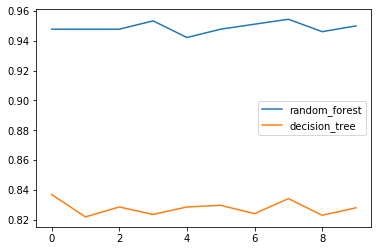

In [7]:
df.plot()

# 의사결정트리 정확도

In [8]:
np.mean(dt_cv_scores)

0.8278594040968341

# 랜덤포레스트 정확도

In [9]:
np.mean(rf_cv_scores)

0.9487402234636871